In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


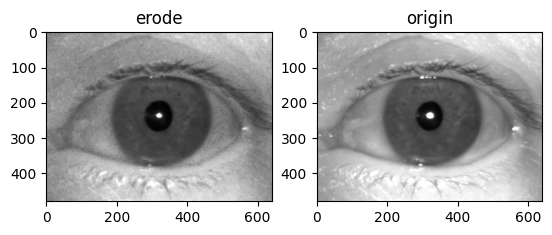

In [26]:
# Load picture and detect edges
image = cv2.imread("/content/drive/MyDrive/PFE/AMF/taha/Iris_20220818_104423_Left.bmp", cv2.IMREAD_GRAYSCALE)

filterSize =(5, 5)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)  
kernel = np.ones((5, 5), np.uint8)
img1 = cv2.erode(image,kernel)

plt.figure()
plt.subplot(1,2,1),plt.imshow(img1, cmap='gray'),plt.title('erode')
plt.subplot(1,2,2),plt.imshow(image, cmap='gray'),plt.title('origin')
plt.show()

ret,th1 = cv2.threshold(img1,30,255,cv2.THRESH_BINARY)
edgesint= canny(th1, sigma=3, low_threshold=150, high_threshold=255)

ret2,th2 = cv2.threshold(img1,120,255,cv2.THRESH_BINARY)
edgesext = canny(th2, sigma=3, low_threshold=150, high_threshold=255)

# calculate hough radius
hough_radiii = np.arange(20, 60)
hough_resi = hough_circle(edgesint, hough_radiii)

hough_radiie = np.arange(70, 2000)
hough_rese = hough_circle(edgesext, hough_radiie)

# Select the most prominent 2 circles
accumsi, cxi, cyi, radiii = hough_circle_peaks(hough_resi, hough_radiii,
                                           total_num_peaks=1)

accumse, cxe, cye, radiie = hough_circle_peaks(hough_rese, hough_radiie,
                                           total_num_peaks=1)

In [27]:
# drawing cercles
imagetest = color.gray2rgb(img1)
for center_yi, center_xi, radiusi, center_ye, center_xe, radiuse, in zip(cyi, cxi, radiii,cye, cxe, radiie):
    circyi, circxi = circle_perimeter(center_yi, center_xi, radiusi,
                                    shape=image.shape)
    imagetest[circyi, circxi] = (220, 20, 20)
    circye, circxe = circle_perimeter(center_ye, center_xe, radiuse,
                                    shape=image.shape)
    imagetest[circye, circxe] = (225, 0, 0)
  

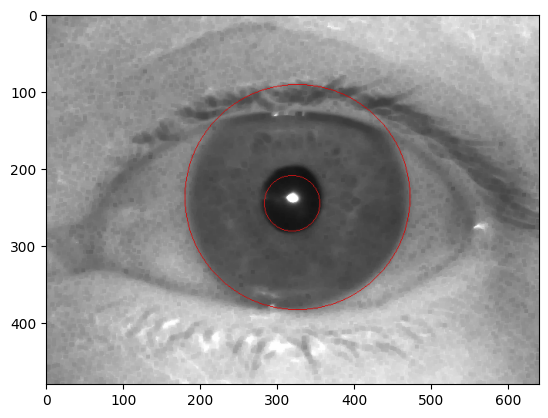

In [28]:
plt.figure()
plt.imshow(imagetest)
plt.show()